In [79]:
import pandas as pd

df_benign_1 = pd.read_csv('../data/test/Benign_test.pcap.csv')
df_benign_2 = pd.read_csv('../data/train/Benign_train.pcap.csv')

df_mqtt_ddos_1 = pd.read_csv('../data/test/MQTT-DDoS-Connect_Flood_test.pcap.csv')
df_mqtt_ddos_2 = pd.read_csv('../data/train/MQTT-DDoS-Connect_Flood_train.pcap.csv')


df_benign_1['label'] = 0
df_benign_2['label'] = 0

df_mqtt_ddos_1['label'] = 1
df_mqtt_ddos_2['label'] = 1

In [80]:
frames = [df_benign_1, df_benign_2, df_mqtt_ddos_1,df_mqtt_ddos_2]

df = pd.concat(frames)

In [101]:
# df = df.sample(frac=1)
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
76106,542387.6,8.2,63.9,18.055023,18.055023,0.0,0.0,0.0,0.0,0.3,...,87.177262,353.9,1.694628e+08,13.5,13.516335,107.916195,20338.981535,1.0,244.6,0
120878,3641.0,6.0,64.0,1.258581,1.258581,0.0,0.0,0.0,0.0,0.5,...,9.154110,76.4,1.478195e-04,5.5,12.197722,12.945866,93.374815,0.9,38.5,0
168817,58369.3,6.0,64.0,1.448968,1.448968,0.0,0.0,0.0,0.0,0.5,...,17.461329,81.2,3.788471e-05,5.5,12.713401,24.694048,340.983805,0.9,38.5,0
10962,2061444.7,15.9,62.4,48.283820,48.283820,0.0,0.0,0.0,0.0,0.0,...,4.466508,96.7,1.694708e+08,13.5,14.271021,6.356209,31.033809,1.0,244.6,0
15285,8417083.0,6.0,56.0,8121.705533,8121.705533,0.0,0.0,0.0,0.0,0.2,...,0.000000,1514.0,1.694694e+08,13.5,55.027266,0.000000,0.000000,0.0,244.6,0


In [103]:
df.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
178461,450845.00,6.0,64.0,2.033894,2.033894,0.0,0.00,0.00,0.00,0.50,...,17.646868,80.50,1.694677e+08,13.5,12.797039,24.970910,312.217004,1.00,244.60,0
75238,460.58,6.0,64.0,6.368273,6.368273,0.0,0.06,0.39,0.33,0.06,...,6.189304,66.17,8.466702e+07,9.5,11.456240,8.730295,54.164421,0.75,141.55,1
78868,98794.10,6.0,64.0,2.036122,2.036122,0.0,0.00,0.00,0.00,0.50,...,13.048761,75.20,1.694650e+08,13.5,12.412466,18.477730,171.073180,1.00,244.60,0
107173,273.05,6.0,64.0,7.179873,7.179873,0.0,0.21,0.19,0.15,0.21,...,5.160911,67.57,8.466702e+07,9.5,11.607380,7.304193,41.187166,0.90,141.55,1
10560,449.92,6.0,64.0,10.926006,10.926006,0.0,0.29,0.15,0.18,0.21,...,5.956646,67.30,8.466705e+07,9.5,11.597104,8.400674,41.662181,0.92,141.55,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445291 entries, 76106 to 10560
Data columns (total 46 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    445291 non-null  float64
 1   Protocol Type    445291 non-null  float64
 2   Duration         445291 non-null  float64
 3   Rate             445291 non-null  float64
 4   Srate            445291 non-null  float64
 5   Drate            445291 non-null  float64
 6   fin_flag_number  445291 non-null  float64
 7   syn_flag_number  445291 non-null  float64
 8   rst_flag_number  445291 non-null  float64
 9   psh_flag_number  445291 non-null  float64
 10  ack_flag_number  445291 non-null  float64
 11  ece_flag_number  445291 non-null  float64
 12  cwr_flag_number  445291 non-null  float64
 13  ack_count        445291 non-null  float64
 14  syn_count        445291 non-null  float64
 15  fin_count        445291 non-null  float64
 16  rst_count        445291 non-null  float6

In [82]:
features  = ["Header_Length","Protocol Type","Duration","Rate","Srate","Drate","fin_flag_number","syn_flag_number","rst_flag_number","psh_flag_number","ack_flag_number","ece_flag_number","cwr_flag_number","ack_count","syn_count","fin_count","rst_count","HTTP","HTTPS","DNS","Telnet","SMTP","SSH","IRC","TCP","UDP","DHCP","ARP","ICMP","IGMP","IPv","LLC","Tot sum","Min","Max","AVG","Std","Tot size","IAT","Number","Magnitue","Radius","Covariance","Variance","Weight"]


X = df.loc[:,features ]
y = df.loc[:,['label']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [83]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9997829146330509

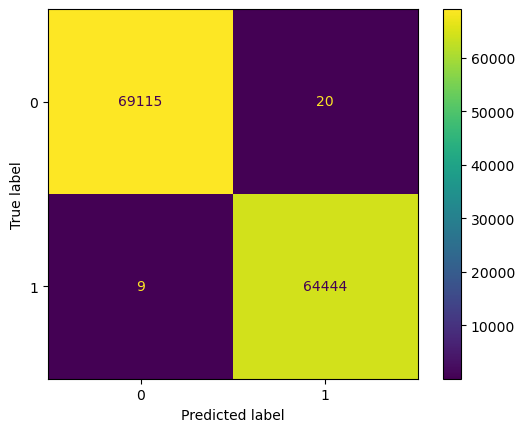

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()


In [91]:

from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.9997826488993214
0.9997829146330509
0.999782915258842
[0.99979025 0.99977505]


In [114]:
test1 = [98.69,6.0,64.0,173299.3495528593,173299.3495528593,0.0,0.16,0.17,0.28,0.23,0.69,0.0,0.0,0.16,0.17,0.4,1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,692.09,59.08,73.78,66.11540543340388,5.319531965796487,65.31,84667047.2917197,9.5,11.491471193202509,7.499204269366774,40.138856529575065,0.9,141.55]

In [131]:
test2 = pd.array(test1)
test2.reshape(1,-1)
type(test2)

pandas.core.arrays.floating.FloatingArray

In [130]:
output = model.predict(test2)
output

c:\Users\priso\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[9.8690002e+01 6.0000000e+00 6.4000000e+01 1.7329934e+05 1.7329934e+05
 0.0000000e+00 1.6000000e-01 1.7000000e-01 2.8000000e-01 2.3000000e-01
 6.9000000e-01 0.0000000e+00 0.0000000e+00 1.6000000e-01 1.7000000e-01
 4.0000001e-01 1.0800000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 1.0000000e+00 6.9209003e+02 5.9080002e+01 7.3779999e+01
 6.6115402e+01 5.3195319e+00 6.5309998e+01 8.4667048e+07 9.5000000e+00
 1.1491471e+01 7.4992042e+00 4.0138855e+01 8.9999998e-01 1.4155000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [122]:
print(x_test.head())
y_test.head()

   Header_Length  Protocol Type  Duration          Rate         Srate  Drate  \
0          138.2            7.1      83.1  39123.054540  39123.054540    0.0   
1           86.0            4.2      44.8  72928.095973  72928.095973    0.0   
2          171.4            4.1      32.0  52552.111857  52552.111857    0.0   
3          227.8            6.0      64.0  24502.562704  24502.562704    0.0   
4          347.6            7.1      64.0   6263.156480   6263.156480    0.0   

   fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  ...  \
0              0.0              0.0              0.0              0.5  ...   
1              0.0              0.0              0.0              0.3  ...   
2              0.0              0.0              0.0              0.2  ...   
3              0.0              0.0              0.0              0.5  ...   
4              0.0              0.0              0.0              0.5  ...   

          AVG         Std  Tot size           IAT 

,label
92485,1
24080,0
37193,0
1688,1
33039,1


In [123]:
model.__dict__

{'criterion': 'squared_error',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
        'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
        'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
        'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count',
        'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH',
        'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC',
        'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
        'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
       dtype=object),
 'n_features_in_': 45,
 'n_outputs_': 1,
 'max_features_': 45,
 'tree_': <sklearn.tree._tree.Tr

In [ ]:
model.predict( )